# Name: Ahmed Ayman

# Import Libaries

In [ ]:
# pip install tpot

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,Normalizer,Binarizer,MinMaxScaler,MaxAbsScaler,PolynomialFeatures
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier,GradientBoostingRegressor,StackingClassifier,VotingClassifier,GradientBoostingClassifier
from sklearn.svm import SVC,LinearSVC
from xgboost import XGBClassifier,XGBRFClassifier,XGBRegressor
from collections import Counter,defaultdict
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pydotplus
import scipy.stats as stats
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline, make_union,Pipeline
from sklearn.decomposition import PCA,KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# from tpot.builtins import StackingEstimator

In [ ]:
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings("ignore")

# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data  = pd.read_csv('drive/MyDrive/Dry Beans Classification/train.csv')
data.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


# Visualization visual inspection of Dataset

In [ ]:
def histogram_boxplot(feature, figsize=(10,5), bins = None):
    
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,
                                           sharex = True, 
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet')
    sns.histplot(x=feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(feature, kde=False, ax=ax_hist2) 
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') 
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') 

In [ ]:
def box_plt(feature, variable):
    plt.figure(figsize=(15,6)) 
    
    sns.boxplot(feature, x='Class',y=variable, data=data,palette='coolwarm',showmeans=True,
           meanprops={"marker":"^",
                    "markerfacecolor":"white",
                    "markeredgecolor":"black",
                    "markersize":"8"});

---

<center> <h1> EDA </h1> </center> 

---

### Data Attributes:

    1.  Area (A): The area of a bean zone and the number of pixels within its boundaries.
    2.  Perimeter (P): Bean circumference is defined as the length of its border.
    3.  Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
    4.  Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the axis.
    5.  Aspect ratio (K): Defines the relationship between L and l.
    6.  Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
    7.  Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
    8.  Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
    9.  Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
    10. Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
    11. Roundness (R): Calculated with the following formula: (4piA)/(P^2)
    12. Compactness (CO): Measures the roundness of an object: Ed/L
    13. ShapeFactor1 (SF1)
    14. ShapeFactor2 (SF2)
    15. ShapeFactor3 (SF3)
    16. ShapeFactor4 (SF4)
    17. Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

In [ ]:
data_heads = data.iloc[:, 1:-1].columns.array # Excluding ID and target
data_heads

<PandasArray>
[           'Area',       'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
    'AspectRation',    'Eccentricity',      'ConvexArea',   'EquivDiameter',
          'Extent',        'Solidity',       'roundness',     'Compactness',
    'ShapeFactor1',    'ShapeFactor2',    'ShapeFactor3',    'ShapeFactor4']
Length: 16, dtype: object

In [ ]:
data.shape

(10834, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

In [ ]:
data[data_heads].describe().T

,count,mean,std,min,25%,50%,75%,max
Area,10834.0,53095.675189,29542.542580,20420.000000,36343.500000,44645.000000,61295.000000,254616.000000
Perimeter,10834.0,855.274892,214.991122,524.932000,703.601250,793.739500,975.517500,1985.370000
MajorAxisLength,10834.0,320.036169,85.961630,183.601165,253.501071,296.377365,376.068399,738.860153
MinorAxisLength,10834.0,202.410342,45.113965,129.576207,175.927024,192.525040,217.315195,450.926187
AspectRation,10834.0,1.581294,0.244314,1.024868,1.432985,1.550761,1.703029,2.388873
Eccentricity,10834.0,0.750588,0.091481,0.218951,0.716250,0.764314,0.809450,0.908167
ConvexArea,10834.0,53816.205926,29999.710739,20684.000000,36731.250000,45148.000000,62251.500000,263261.000000
EquivDiameter,10834.0,253.123583,59.433080,161.243764,215.113880,238.419335,279.362162,569.374358
Extent,10834.0,0.749937,0.048949,0.555315,0.718778,0.760141,0.786871,0.866195
Solidity,10834.0,0.987152,0.004626,0.919246,0.985627,0.988290,0.990014,0.994677


In [ ]:
data[data_heads].isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

---
## Uni-Variate Data Analysis:

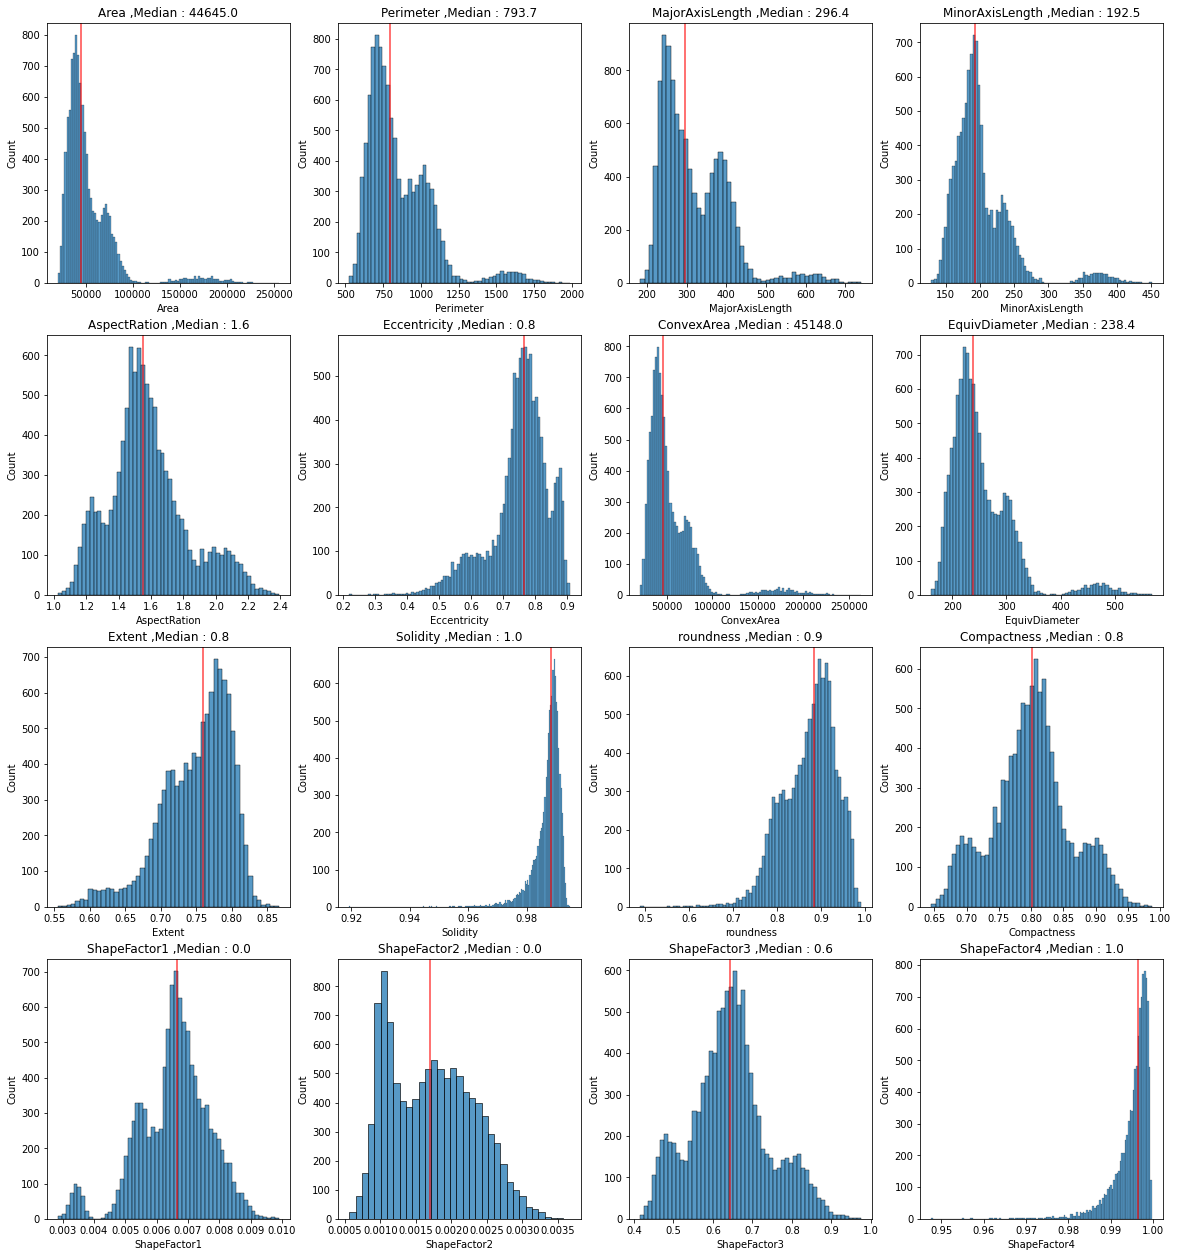

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(20, 22))
for i, axe in enumerate(axes.flatten()):
    sns.histplot(data[data_heads[i]], ax = axe)
    median = data[data_heads[i]].median()
    axe.set_title(data_heads[i] + f' ,Median : {median:0.1f}')
    axe.axvline(median, color ='red', lw=2, alpha = 0.55)

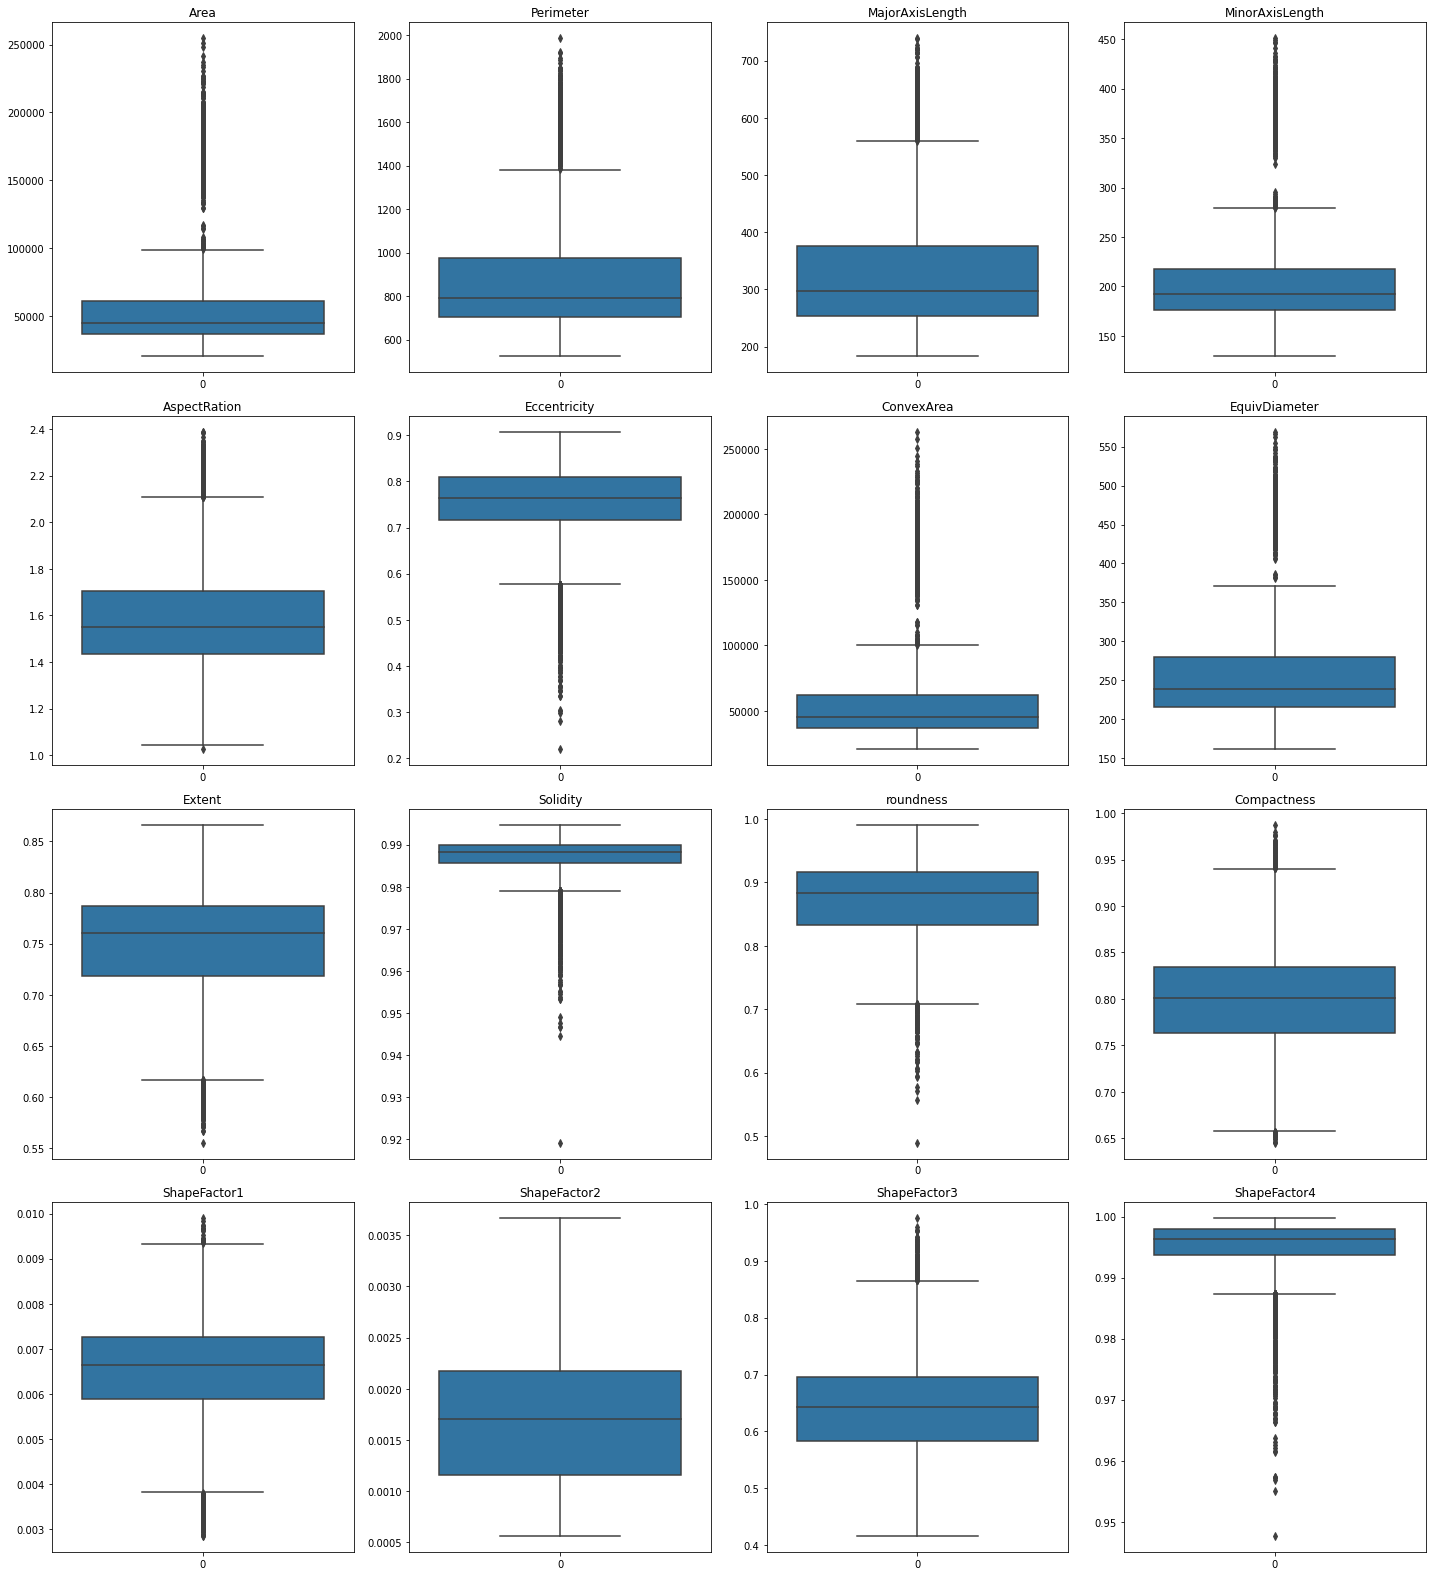

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(20, 22))
for i, axe in enumerate(axes.flatten()):
    sns.boxplot(data = data[data_heads[i]], ax = axe)
    axe.set_title(data_heads[i])
    
plt.tight_layout()
plt.show()

---

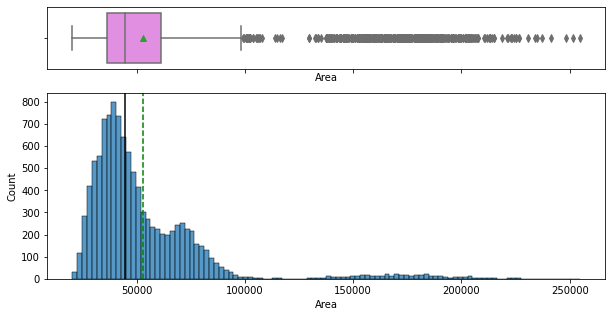

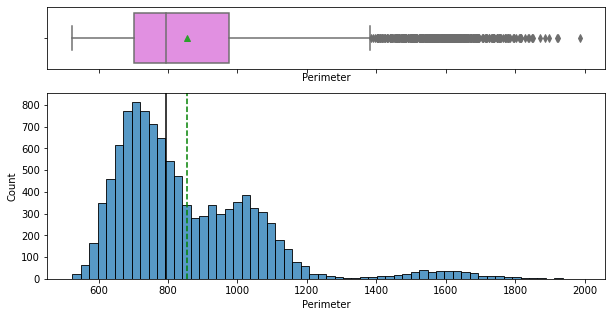

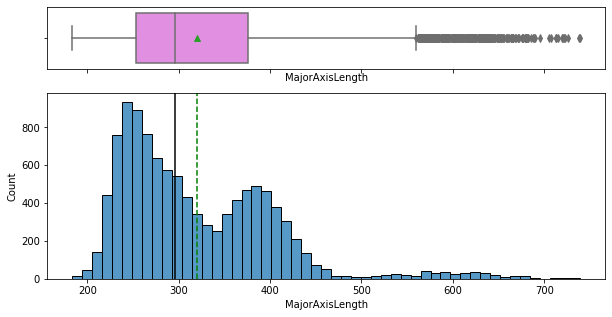

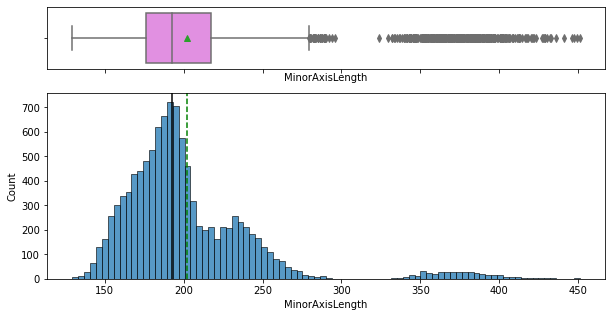

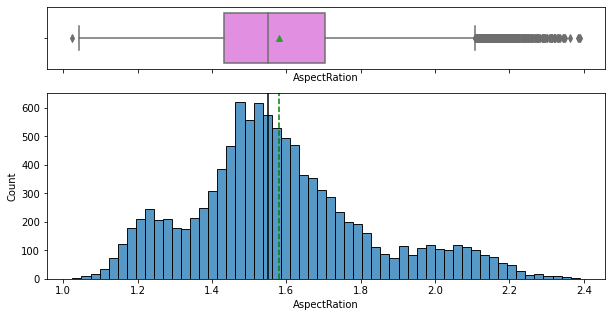

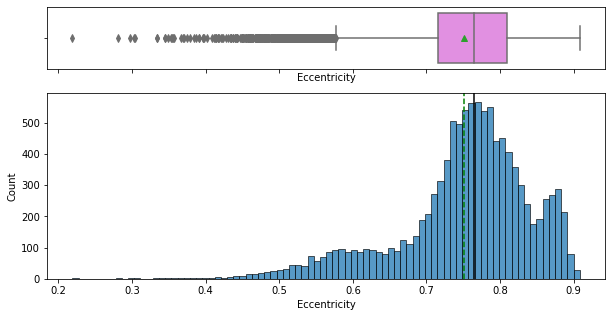

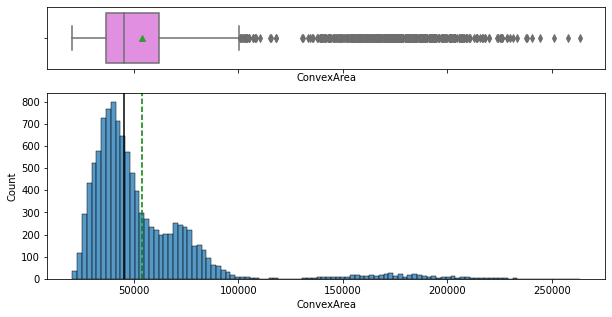

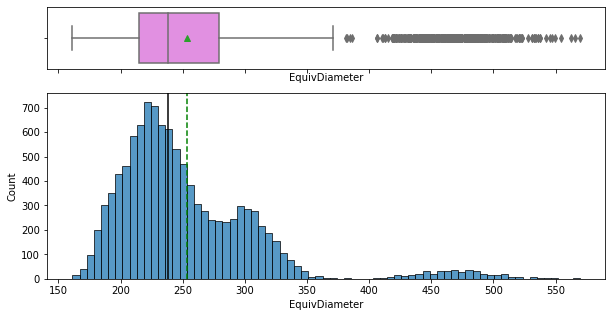

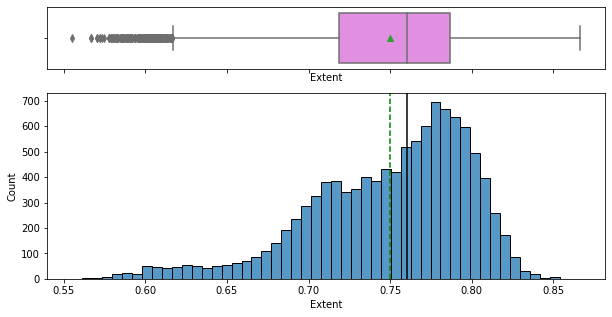

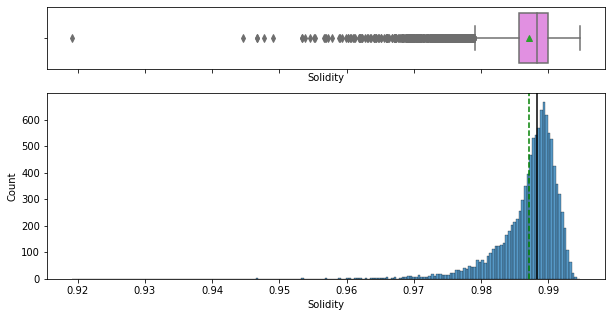

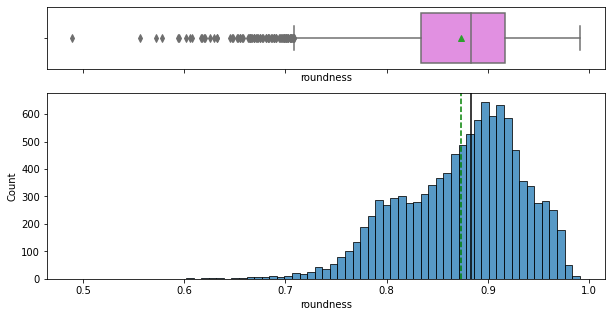

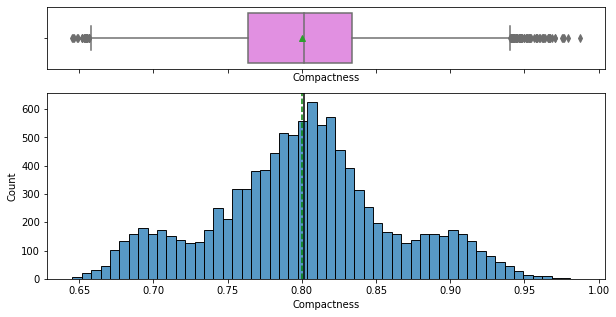

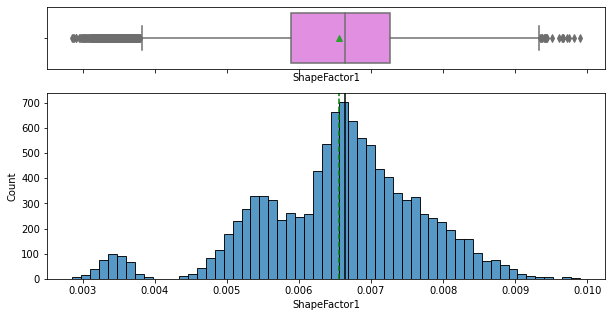

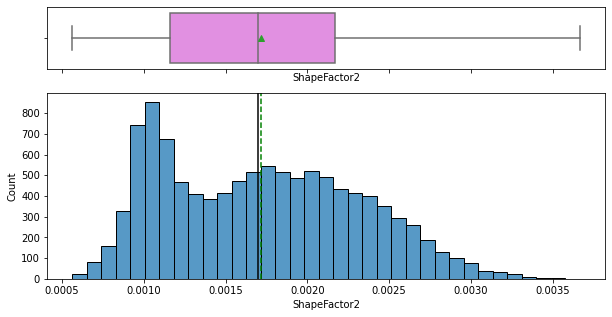

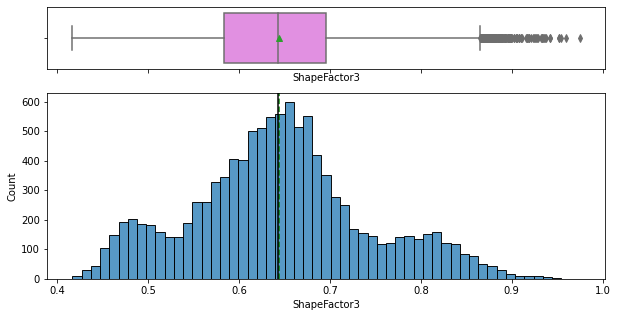

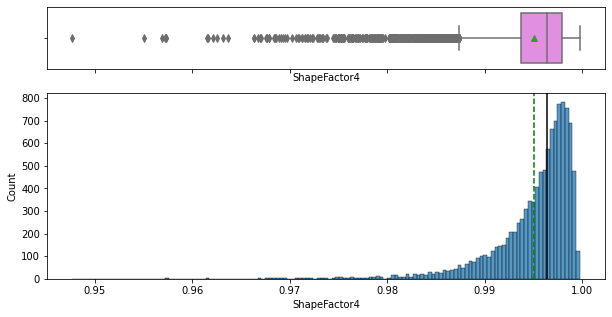

In [ ]:
for col in data_heads:
    histogram_boxplot(data[col])

<div class="alert alert-block alert-info">
    - Area is right skewed bit lot of max outliers, we can observe few extreme values afer 210000. <br> 
    - Perimeter is right-skewed data with max outliers; from 1900 onwards, we can see few data points having significantly higher values. <br>
    - Major Axis Length is right-skewed data with max outliers; from 700 onwards, we can see few data points having significantly higher values. <br>
    - Minor Axis Length is right-skewed data with max outliers; from 300 onwards, we can see significantly higher values. <br>
    - Eccentricity is left-skewed with minimum outliers; we can see few data points having significantly lesser values <br>
    - EquivDiameter is right-skewed data. <br>
    - Extent is left-skewed data. <br>
    - Compactness is normally distributed. <br>
    - Shapefactor 1 is normally distributed with min and max outliers. <br>
    - ShapeFactor 2 is normally distributed without any outliers. <br> 
    - ShapeFactor 4 is extremely left skewed with minimum outliers. <br>
    - Comparing to ShapeFactor 3, 2, and 1 we can observe ShapeFactor 4 is extremely skewed. <br> 
    
    - Most of the features are skewed, some features having significantly higher or lower values.
    
</div> 

---

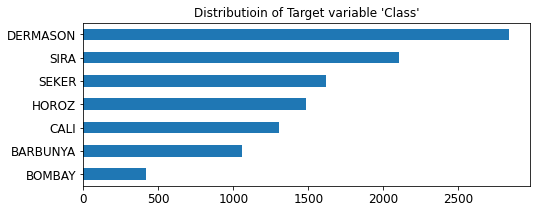

In [ ]:
plt.figure(figsize=(8,3))
data['y'].value_counts().sort_values().tail(7).plot(kind='barh', fontsize=12)
plt.title("Distributioin of Target variable 'Class'");

- The Plot above shows how the target is distributed.

---

## Bi-Variate and Multi-Variate Data Analysis:

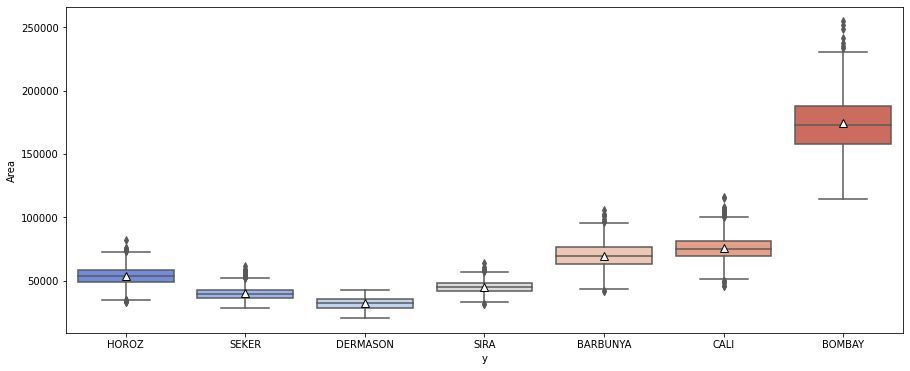

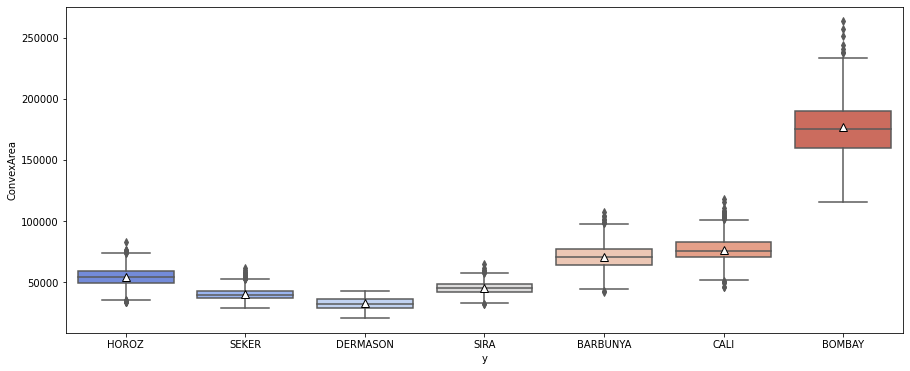

In [ ]:
box_plt(data["y"], data['Area'])
box_plt(data["y"], data['ConvexArea'])

- BOMBAY having higher Area, follwed by Cali and Barbunya. Least Area is for Dermason and Seker.

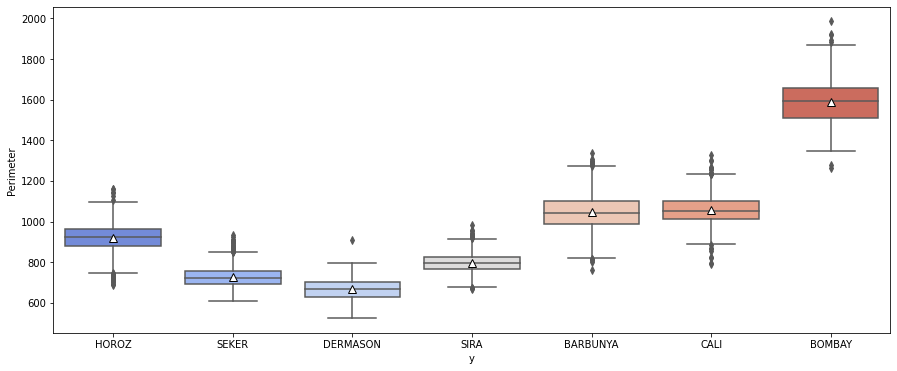

In [ ]:
box_plt(data["y"], data['Perimeter'])

- Bombay having higher Perimeter, followed by Barbunya and Cali. Least Perimeter is for Dermason and Seker.

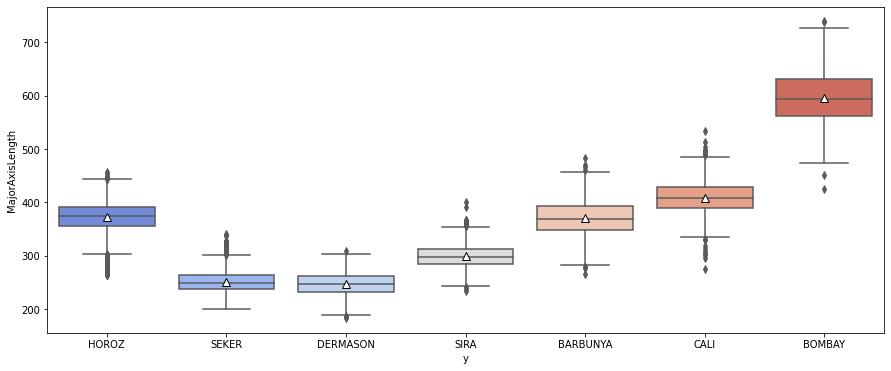

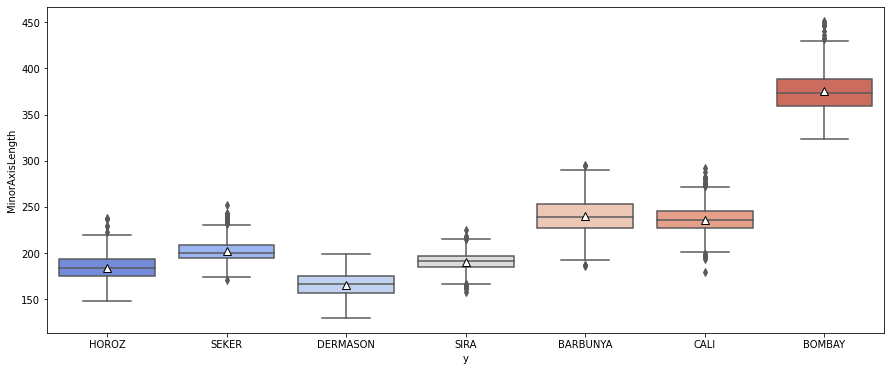

In [ ]:
box_plt(data["y"], data['MajorAxisLength'])
box_plt(data["y"], data['MinorAxisLength'])

- Bombay having higher Major Axis Length followed by Calia and Barbunya, least Major Axis Length is for Dermason and Seker.
- Bombay having higher Minor Axis values, followed by Barbuya and Cali, least being Dermason. 

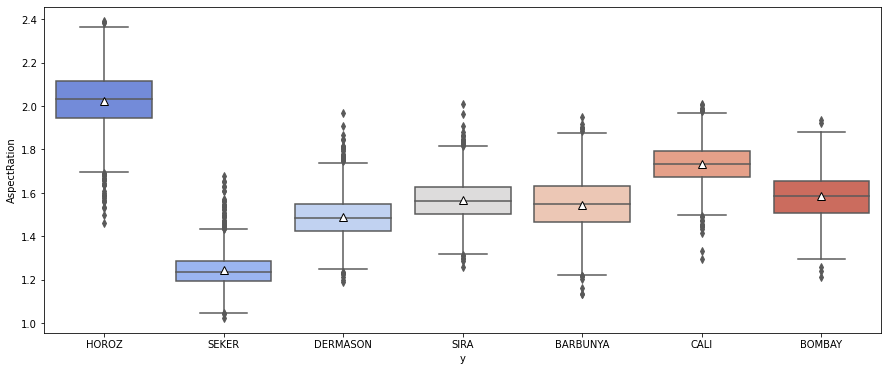

In [ ]:
box_plt(data["y"], data['AspectRation'])

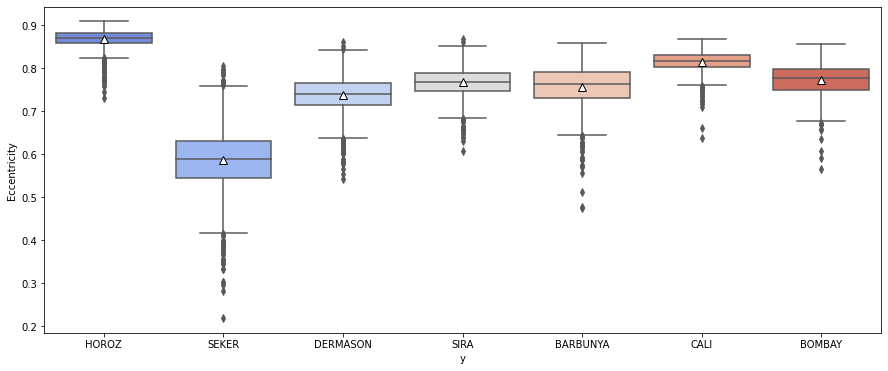

In [ ]:
box_plt(data["y"], data['Eccentricity'])

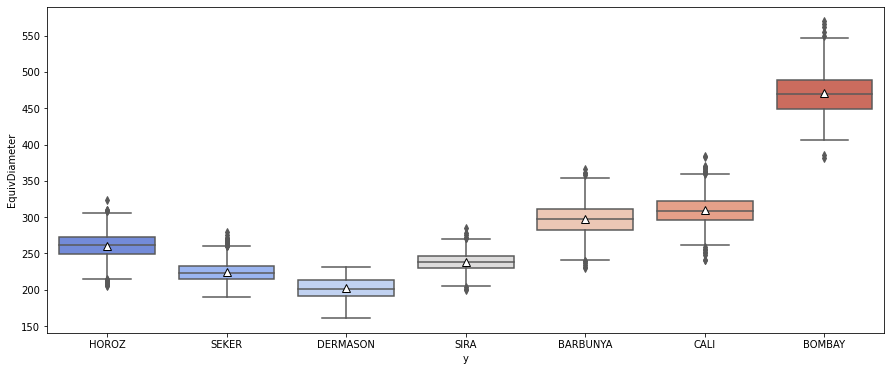

In [ ]:
box_plt(data["y"], data['EquivDiameter'])

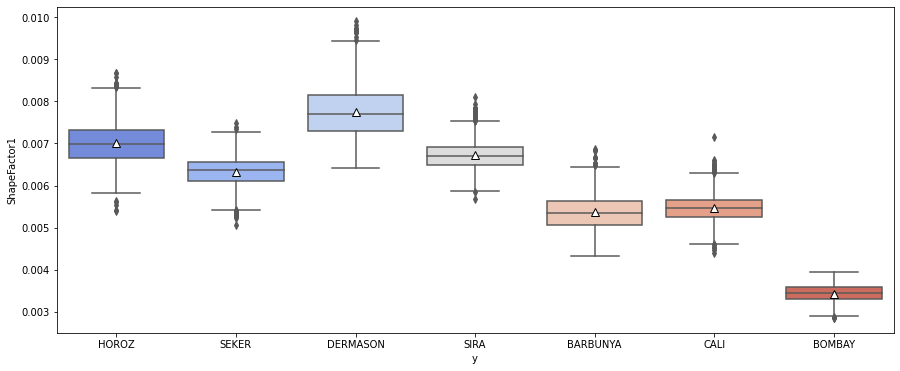

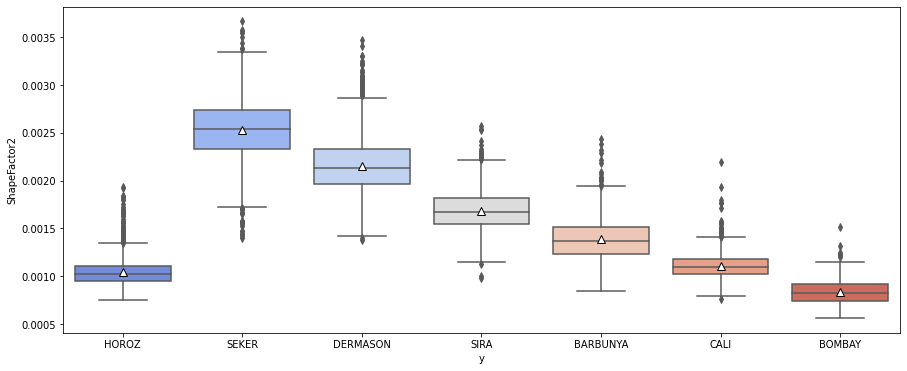

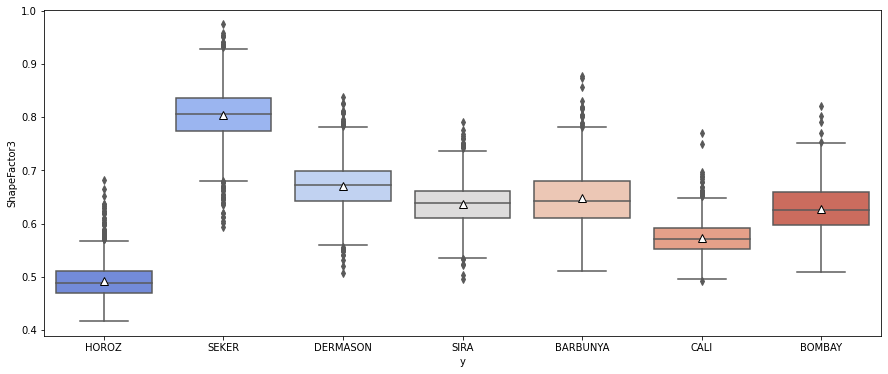

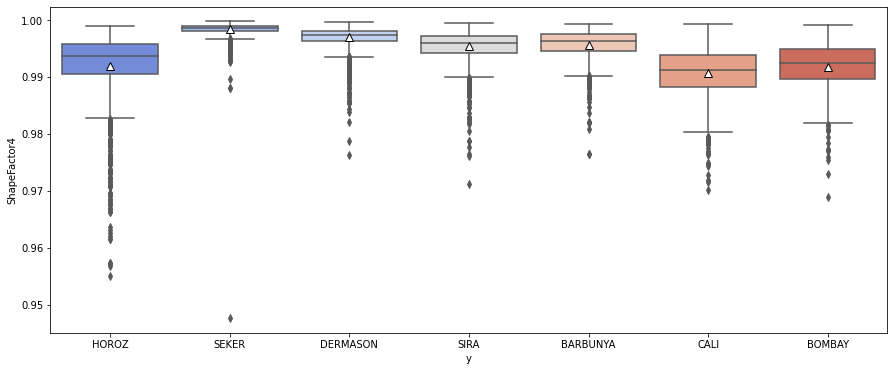

In [ ]:
box_plt(data["y"], data['ShapeFactor1'])
box_plt(data["y"], data['ShapeFactor2'])
box_plt(data["y"], data['ShapeFactor3'])
box_plt(data["y"], data['ShapeFactor4'])

- ShapeFactor 2 and 3 merely have the same trend, but ShapeFactor4 has a different (**Skewed**) one.


In [ ]:
sns.pairplot(data[data_heads]);

Output hidden; open in https://colab.research.google.com to view.

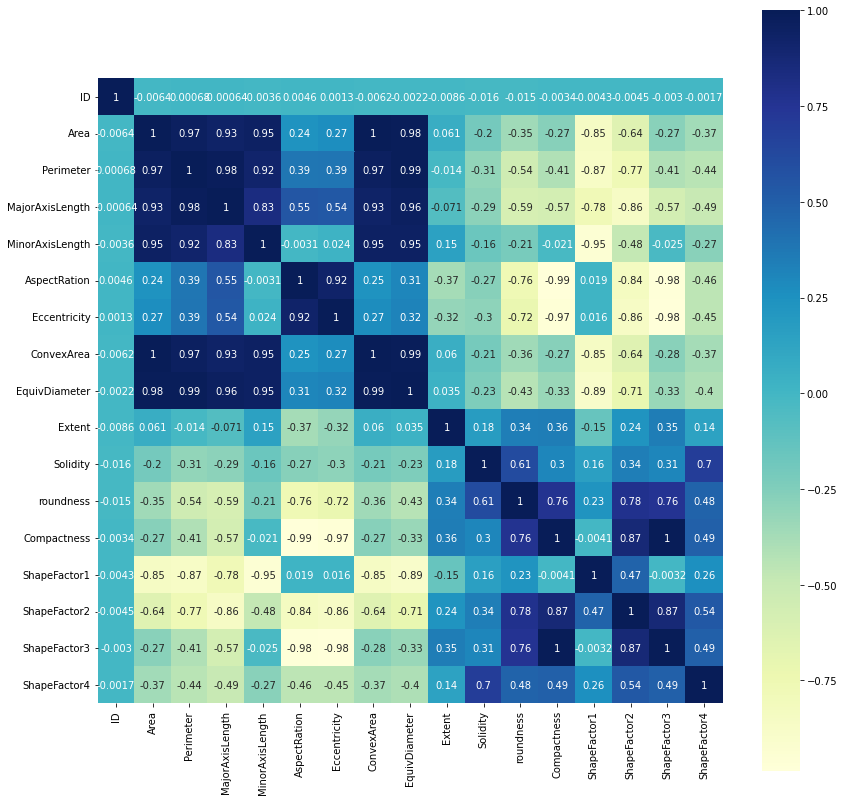

In [ ]:
plt.figure(figsize=(14, 14))
dat_cor = data.corr()
sns.heatmap(dat_cor, cmap = 'YlGnBu', annot=True, square=True);

- From the above we conclude that the majority of features are having higher correlation. (**Calculated from each others**)
- We can handle these correlation issues in two ways: <br>
1) either drop those highly correlated features<br>
2) Leave them as it is because Tree-based models doesn't get affected with correlated traits, when they decide to split, the tree will choose only one of the perfectly correlated features. However, Linear Models are not immune to that problem and you should fix it before training the model.

In [ ]:
corr_with_y = data.corr()
corr_with_y

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
ID,1.000000,-0.006442,0.000679,-0.000639,-0.003572,0.004579,0.001265,-0.006194,-0.002186,-0.008626,-0.015873,-0.015406,-0.003421,-0.004321,-0.004543,-0.002997,-0.001742
Area,-0.006442,1.000000,0.966881,0.933198,0.952536,0.243893,0.268565,0.999940,0.984987,0.061387,-0.200078,-0.354127,-0.270134,-0.848371,-0.640619,-0.274081,-0.365265
Perimeter,0.000679,0.966881,1.000000,0.977830,0.915162,0.386119,0.390878,0.967823,0.991439,-0.013889,-0.307817,-0.543906,-0.407622,-0.866250,-0.768104,-0.409079,-0.439272
MajorAxisLength,-0.000639,0.933198,0.977830,1.000000,0.830452,0.548912,0.539787,0.933934,0.962754,-0.070935,-0.285916,-0.589910,-0.566905,-0.777222,-0.858387,-0.566625,-0.491591
MinorAxisLength,-0.003572,0.952536,0.915162,0.830452,1.000000,-0.003095,0.024388,0.952268,0.949832,0.152157,-0.160567,-0.211275,-0.021042,-0.947040,-0.476659,-0.025152,-0.273554
AspectRation,0.004579,0.243893,0.386119,0.548912,-0.003095,1.000000,0.924040,0.245408,0.305557,-0.372383,-0.266038,-0.762150,-0.987664,0.019197,-0.837526,-0.978550,-0.456479
Eccentricity,0.001265,0.268565,0.390878,0.539787,0.024388,0.924040,1.000000,0.270283,0.319497,-0.319550,-0.295614,-0.716765,-0.970173,0.015644,-0.859207,-0.980946,-0.453895
ConvexArea,-0.006194,0.999940,0.967823,0.933934,0.952268,0.245408,0.270283,1.000000,0.985223,0.059711,-0.209552,-0.358655,-0.271930,-0.848345,-0.642119,-0.275901,-0.371420
EquivDiameter,-0.002186,0.984987,0.991439,0.962754,0.949832,0.305557,0.319497,0.985223,1.000000,0.035291,-0.234767,-0.432327,-0.329457,-0.893598,-0.714397,-0.332067,-0.402038
Extent,-0.008626,0.061387,-0.013889,-0.070935,0.152157,-0.372383,-0.319550,0.059711,0.035291,1.000000,0.180843,0.341669,0.355279,-0.147888,0.235020,0.348442,0.142275


# Split Data

In [ ]:
Strongly_corr_features = data[["Area","Perimeter","AspectRation","Eccentricity","roundness","Compactness"]]
X = data.drop(['ID','y'], axis=1)
y = data.y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)

# Train And Test

## MLPClassifier_Try1

In [ ]:
# df = data.copy().drop(['ID'], axis=1)
# feature_columns = [x for x in df.columns if x not in ['y']]
# print(feature_columns)
# skew_columns = (df[feature_columns].skew().sort_values(ascending=False))
# skew_columns = skew_columns.loc[skew_columns > 0.8]
# skew_columns

# for col in skew_columns.index.tolist():
#     df[col] = np.log1p(df[col])

# X2 = df.drop(['y'], axis=1)
# y2 = df.y
# X2.head()

In [ ]:

# SSX = StandardScaler().fit_transform(X2)
# df[feature_columns] = StandardScaler().fit_transform(df[feature_columns])
# print(SSX)
# pca = PCA()
# X2D = pca.fit_transform(SSX)
# pca.explained_variance_ratio_

In [ ]:
# fig, ax_list = plt.subplots(nrows=4, ncols=4, sharey=False, figsize=(36,36))
# ax_list = ax_list.flatten()
# for name, ax in zip(feature_columns, ax_list):
#      g = sns.histplot(df, x=name, bins=10, ax=ax).set(title=name)

In [ ]:
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, stratify=y,random_state=1)

In [ ]:
# mlp_model2 = make_pipeline(
#     StandardScaler(),
#     PCA(n_components=11),
#     MLPClassifier(alpha = 0.01,random_state=42)
#     )
# mlp_model2.fit(X_train2, y_train2)
# print('Train Score is : ' , mlp_model2.score(X_train2, y_train2)) #0.9410461538461539
# print('Test Score is : ' , mlp_model2.score(X_test2, y_test2)) #0.935031376891842

In [ ]:
# print('Train F1_Score is : ' ,f1_score(y_train2, mlp_model2.predict(X_train2), average='macro')) #0.9520408736334732
# print('Test F1_Score is : ' ,f1_score(y_test2, mlp_model2.predict(X_test2), average='macro')) #0.9470457054306619

## MLPClassifier

In [ ]:
mlp_model = make_pipeline(
    StandardScaler(),
    PCA(n_components=11),
    MLPClassifier(alpha = 0.01,random_state=42)
    )
mlp_model.fit(X_train, y_train)
print('Train Score is : ' , mlp_model.score(X_train, y_train))
print('Test Score is : ' , mlp_model.score(X_test, y_test))

Train Score is :  0.9419076923076923
Test Score is :  0.9376153562200074


In [ ]:
mlp_pred = mlp_model.predict(X_test)
print('Train F1_Score is : ' ,f1_score(y_train, mlp_model.predict(X_train), average='macro'))
print('Test F1_Score is : ' ,f1_score(y_test, mlp_pred, average='macro'))

Train F1_Score is :  0.9527479675935432
Test F1_Score is :  0.9499400420017433


### Kernal PCA

In [ ]:
# mlp_kernal = make_pipeline(
#     StandardScaler(),
#     KernelPCA(n_components=11,kernel="cosine"),
#     MLPClassifier(alpha = 0.01,random_state=42)
#     )
# mlp_kernal.fit(X_train, y_train)
# print('Train Score is : ' , mlp_kernal.score(X_train, y_train)) #0.9350153846153846
# print('Test Score is : ' , mlp_kernal.score(X_test, y_test)) #0.9328165374677002


In [ ]:
# print('Train F1_Score is : ' ,f1_score(y_train, mlp_kernal.predict(X_train), average='macro')) #0.9460235436708764
# print('Test F1_Score is : ' ,f1_score(y_test, mlp_kernal.predict(X_test), average='macro')) #0.943776044130203

### MLP Grid Search

In [ ]:
# MLP_model = MLPClassifier()
# # range of parameter values
# alpha = [0.01,0.001,0.0001]
# learning_rate_init = [0.001, 0.0001, 0.00001]
# # parameters grid
# grid_param = [
#     {'hidden_layer_sizes' : [(200,),(250,),(275,)],
#      'alpha' : alpha,
#      'max_iter' : [100,200,300],
#      'learning_rate_init' : learning_rate_init}
# ]
# mlp_gs = GridSearchCV ( estimator = MLP_model,
#                    param_grid = grid_param,
#                    scoring = 'accuracy',
#                    cv = 5,
#                    refit = True,
#                    n_jobs = 4
#                    )

# mlp_gs = mlp_gs.fit ( X_train, y_train )

# print ( 'Best hyperparameter:', mlp_gs.best_params_ )

# print ( 'Best score: %.5f' %mlp_gs.best_score_ )

In [ ]:
# from sklearn.metrics import accuracy_score
# y_pred = mlp_gs.predict(X_test)
# accuracy_score(y_test, y_pred)

In [ ]:
# X2 = Sscaler.fit_transform(X)
# mlp_gs = mlp_gs.fit ( X2, y )

# print ( 'Best hyperparameter:', mlp_gs.best_params_ )

# print ( 'Best score: %.5f' %mlp_gs.best_score_ )

In [ ]:
pipe = Pipeline(steps=[('Sscaler', StandardScaler()), ('pca', PCA()), ('MLP', MLPClassifier(random_state=42))])
param_grid = {
    'pca__n_components': [5, 7, 8, 9, 10, 11, 12],
    'MLP__alpha': [0.1,0.01,0.001],
    'MLP__max_iter': [300,400,500,1000],
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)


In [ ]:
print("Best Score :" , search.best_score_)
print('Test Score is : ' , search.score(X_test, y_test))
print('Train F1_Score is : ' ,f1_score(y_train, search.predict(X_train), average='macro'))
print('Test F1_Score is : ' ,f1_score(y_test, search.predict(X_test), average='macro'))
print(search.best_params_)

## StackingEstimator

In [ ]:
# l_encoder = LabelEncoder()
# y_train_encoded = l_encoder.fit_transform(y_train)

In [ ]:
# exported_pipeline = make_pipeline(
#     StandardScaler(),
#     StackingEstimator(estimator=MLPClassifier(alpha=0.001, learning_rate_init=0.001)),
#     RandomForestClassifier(bootstrap=True, criterion="entropy", max_features=0.2, min_samples_leaf=19, min_samples_split=13, n_estimators=100)
# )

# exported_pipeline.fit(X_train, y_train_encoded)
# results = exported_pipeline.predict(X_test)

In [ ]:
# Stacking_pred = l_encoder.inverse_transform(results)
# accuracy_score(y_test, Stacking_pred) #0.9324473975636767

In [ ]:
# print('Train F1_Score is : ' ,f1_score(y_train_encoded, exported_pipeline.predict(X_train), average='macro')) #0.9536512786572425
# print('Test F1_Score is : ' ,f1_score(y_test, Stacking_pred, average='macro')) #0.9444031678566996

## StackingClassifier

In [ ]:
# estimators = [('mlp',MLPClassifier(alpha=0.001, learning_rate_init=0.001)), ('rf',RandomForestClassifier(bootstrap=True, criterion="entropy", max_features=0.2, min_samples_leaf=19, min_samples_split=13, n_estimators=100))]

estimators = [('mlp',MLPClassifier()), ('XGB',XGBClassifier())]

stacking = make_pipeline(
    StandardScaler(),
    PCA(),
    StackingClassifier(estimators=estimators)#, final_estimator = MLPClassifier())
    )
# estimators = [('rf', RandomForestClassifier(n_estimators=100, random_state=42)),('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))]
# clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking.fit(X_train, y_train)  #Without Pca : 0.9372462163159837  #With Pca : 0.9354005167958657
print('Train Score is : ' , stacking.score(X_train, y_train))
print('Test Score is : ' , stacking.score(X_test, y_test))

Train Score is :  0.9457230769230769
Test Score is :  0.9368770764119602


In [ ]:
stacking_pred = stacking.predict(X_test)
print('Train F1_Score is : ' ,f1_score(y_train, stacking.predict(X_train), average='macro'))
print('Test F1_Score is : ' ,f1_score(y_test, stacking_pred, average='macro'))

Train F1_Score is :  0.955779782849022
Test F1_Score is :  0.9487354140769755


In [ ]:
estimator2 = [ ( 'mlp' , 
      make_pipeline(
        StandardScaler(),
        PCA(n_components=11),
        MLPClassifier(alpha=0.01, learning_rate_init=0.001, random_state=42,max_iter=1000),
      )
    ),
]
stacking2 = StackingClassifier(estimators=estimator2, final_estimator = RandomForestClassifier(bootstrap=True, criterion="entropy", n_estimators=1000))

stacking2.fit(X_train, y_train)
print('Train Score is : ' , stacking2.score(X_train, y_train))
print('Test Score is : ' , stacking2.score(X_test, y_test))

StackingClassifier(cv=None,
                   estimators=[('mlp',
                                Pipeline(memory=None,
                                         steps=[('standardscaler',
                                                 StandardScaler(copy=True,
                                                                with_mean=True,
                                                                with_std=True)),
                                                ('pca',
                                                 PCA(copy=True,
                                                     iterated_power='auto',
                                                     n_components=11,
                                                     random_state=None,
                                                     svd_solver='auto', tol=0.0,
                                                     whiten=False)),
                                                ('mlpclassifier',
                      

In [ ]:
print('Train F1_Score is : ' ,f1_score(y_train, stacking2.predict(X_train), average='macro'))
print('Test F1_Score is : ' ,f1_score(y_test, stacking2.predict(X_test), average='macro'))

Train Score is :  0.9457230769230769
Test Score is :  0.9313399778516057
Train F1_Score is :  0.9559507391514062
Test F1_Score is :  0.9441807418805348


## Voting

In [ ]:
# from sklearn.preprocessing import FunctionTransformer
VotingClassifierModel = make_pipeline(
    StandardScaler(),
    PCA(),
    VotingClassifier(estimators=[('MLP',MLPClassifier()),('XGB',XGBClassifier())], voting='hard')
)
VotingClassifierModel.fit(X_train, y_train)
print('VotingClassifierModel Train Score is : ' , VotingClassifierModel.score(X_train, y_train))
print('VotingClassifierModel Test Score is : ' , VotingClassifierModel.score(X_test, y_test))

VotingClassifierModel Train Score is :  0.9473230769230769
VotingClassifierModel Test Score is :  0.9346622369878184


In [ ]:
voting_pred = VotingClassifierModel.predict(X_test)
print('Train F1_Score is : ' ,f1_score(y_train, VotingClassifierModel.predict(X_train), average='macro'))
print('Test F1_Score is : ' ,f1_score(y_test, voting_pred, average='macro'))

Train F1_Score is :  0.9561962018534773
Test F1_Score is :  0.9463906834987309


## Feature Selection by KBest

In [ ]:
#Feature Selection by KBest 
print('Original X Shape is ' , X_train.shape)
n_pip = make_pipeline(
    StandardScaler(),
    PCA(),
    LogisticRegression()
    )

from sklearn.feature_selection import SelectFromModel

FeatureSelection = SelectFromModel(estimator = RandomForestClassifier(), max_features = None) # make sure that thismodel is well-defined
X2_train = FeatureSelection.fit_transform(X_train, y_train)
X2_test = FeatureSelection.transform(X_test)
#showing X Dimension 
print('X Shape is ' , X2_train.shape)
print('X Shape is ' , X2_test.shape)
print('Selected Features are : ' , FeatureSelection.get_support())

Original X Shape is  (8125, 16)
X Shape is  (8125, 9)
X Shape is  (2709, 9)
Selected Features are :  [False  True  True  True  True  True  True False False False False  True
  True False  True False]


In [ ]:
l = list(X_train.columns[FeatureSelection.get_support()])
X2_train = X_train[l]
X2_test = X_test[l]

In [ ]:
RF = make_pipeline(
    StandardScaler(),
    PCA(),
    RandomForestClassifier(n_estimators = 100,criterion = 'entropy', max_depth = 11)
    )
RF.fit(X2_train, y_train)
print('Train Score is : ' , RF.score(X2_train, y_train))
print('Test Score is : ' , RF.score(X2_test, y_test))

Train Score is :  0.9783384615384615
Test Score is :  0.9228497600590624


## RandomForestClassifier

In [ ]:
RFC = make_pipeline(
    StandardScaler(),
    PCA(),
    RandomForestClassifier()
    )
RFC.fit(X_train,y_train)
print('Train Score is : ' , RFC.score(X_train, y_train))
print('Test Score is : ' , RFC.score(X_test, y_test))

Train Score is :  1.0
Test Score is :  0.9324473975636767


## SVC

In [ ]:
svc = make_pipeline(
    StandardScaler(),
    PCA(),
    SVC(C=2.0)
    )
svc.fit(X_train,y_train)
print('Train Score is : ' , svc.score(X_train, y_train))
print('Test Score is : ' , svc.score(X_test, y_test))

Train Score is :  0.9332923076923076
Test Score is :  0.9298634182355112


In [ ]:
from sklearn.model_selection import GridSearchCV
model = SVC()
# range of parameter values

# parameters grid
grid_param = [
    {'C' : [1.5, 2.0, 2.5]
     
     }
]
svc_gs = GridSearchCV ( estimator = model,
                   param_grid = grid_param,
                   scoring = 'accuracy',
                   cv = 5,
                   refit = True,
                   n_jobs = 4
                   )

svc_gs = svc_gs.fit ( X_train, y_train )

print ( 'Best hyperparameter:', svc_gs.best_params_ )

print ( 'Best score: %.5f' %svc_gs.best_score_ )

Best hyperparameter: {'C': 2.0}
Best score: 0.63089


## GradientBoostingClassifier

In [ ]:
#----------------------------------------------------

#----------------------------------------------------
#Applying GradientBoostingClassifier Model 

'''
ensemble.GradientBoostingClassifier(loss='deviance’, learning_rate=0.1,n_estimators=100, subsample=1.0,
                                    criterion='friedman_mse’,min_samples_split=2,min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,max_depth=3,min_impurity_decrease=0.0,
                                    min_impurity_split=None,init=None, random_state=None,max_features=None,
                                    verbose=0, max_leaf_nodes=None,warm_start=False, presort='auto’, 
                                    validation_fraction=0.1,n_iter_no_change=None, tol=0.0001)
'''
grid_param = [
    {'n_estimators' : [50,100,150],
     'max_depth': [3,5,7]
     
     }
]
# svc_gs = GridSearchCV ( estimator = GradientBoostingClassifier(),
#                    param_grid = grid_param,
#                    scoring = 'accuracy',
#                    cv = 5,
#                    refit = True,
#                    n_jobs = 4
#                    )
GBCModel = make_pipeline(
    StandardScaler(),
    PCA(),
    GradientBoostingClassifier()
)
GBCModel.fit(X_train, y_train)

#Calculating Details
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))
#print('GBCModel features importances are : ' , GBCModel.feature_importances_)
#print('----------------------------------------------------')

#Calculating Prediction
# y_pred = GBCModel.predict(X_test)
# y_pred_prob = GBCModel.predict_proba(X_test)
#print('Predicted Value for GBCModel is : ' , y_pred[:10])
#print('Prediction Probabilities Value for GBCModel is : ' , y_pred_prob[:10])

GBCModel Train Score is :  0.9687384615384615
GBCModel Test Score is :  0.9317091177556294


## XGBClassifier

In [ ]:
XGB = make_pipeline(
    StandardScaler(),
    PCA(),
    XGBClassifier() #learning_rate=0.01, max_depth=10, min_child_weight=17, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0
  )
XGB.fit(X_train,y_train)
print('Train Score is : ' , XGB.score(X_train, y_train))
print('Test Score is : ' , XGB.score(X_test, y_test))

Train Score is :  0.9495384615384616
Test Score is :  0.9294942783314877


In [ ]:
from sklearn.model_selection import GridSearchCV
model = XGBClassifier()
# range of parameter values

# parameters grid
grid_param = [
    {'C' : [1.5, 2.0, 2.5]
     
     }
]
svc_gs = GridSearchCV ( estimator = model,
                   param_grid = grid_param,
                   scoring = 'accuracy',
                   cv = 5,
                   refit = True,
                   n_jobs = 4
                   )

svc_gs = svc_gs.fit ( X_train, y_train )

print ( 'Best hyperparameter:', svc_gs.best_params_ )

print ( 'Best score: %.5f' %svc_gs.best_score_ )

Best hyperparameter: {'C': 1.5}
Best score: 0.92308


## XGBRF

In [ ]:
XGBRF = make_pipeline(
    StandardScaler(),
    PCA(),
    XGBRFClassifier()
)
XGBRF.fit(X_train,y_train)
print('Train Score is : ' , XGBRF.score(X_train, y_train))
print('Test Score is : ' , XGBRF.score(X_test, y_test))

Train Score is :  0.9079384615384616
Test Score is :  0.8962716869693614


## KNN

In [ ]:
knn = make_pipeline(
    StandardScaler(),
    PCA(),
    KNeighborsClassifier()
    )
knn.fit(X_train, y_train)
print('Train Score is : ' , knn.score(X_train, y_train))
print('Test Score is : ' , knn.score(X_test, y_test))

Train Score is :  0.9388307692307692
Test Score is :  0.9224806201550387


## LinearDiscriminantAnalysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


#----------------------------------------------------
#Applying LDA Model 

'''
sklearn.discriminant_analysis.LinearDiscriminantAnalysis(solver='svd’,shrinkage=None,priors=None,
                                                         n_components=None,store_covariance=False,tol=0.0001)
'''

LDAModel = make_pipeline(
    StandardScaler(),
    PCA(),
    LinearDiscriminantAnalysis() #n_components=3,solver='svd',tol=0.0001
)
LDAModel.fit(X_train, y_train)

#Calculating Details
print('LDAModel Train Score is : ' , LDAModel.score(X_train, y_train))
print('LDAModel Test Score is : ' , LDAModel.score(X_test, y_test))
# print('LDAModel means are : ' , LDAModel.means_)
# print('LDAModel classea are : ' , LDAModel.classes_)
#print('----------------------------------------------------')

#Calculating Prediction
# y_pred = LDAModel.predict(X_test)
# y_pred_prob = LDAModel.predict_proba(X_test)
# print('Predicted Value for LDAModel is : ' , y_pred[:10])
# print('Prediction Probabilities Value for LDAModel is : ' , y_pred_prob[:10])

LDAModel Train Score is :  0.9044923076923077
LDAModel Test Score is :  0.905500184569952


## QuadraticDiscriminantAnalysis

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#Applying QDA Model 

'''
sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis(priors=None,reg_param=0.0,store_covariance=False,
                                                            tol=0.0001,store_covariances=None)
'''

QDAModel = make_pipeline(
    StandardScaler(),
    PCA(),
    QuadraticDiscriminantAnalysis() # tol=0.0001
)
QDAModel.fit(X_train, y_train)

#Calculating Details
print('QDAModel Train Score is : ' , QDAModel.score(X_train, y_train))
print('QDAModel Test Score is : ' , QDAModel.score(X_test, y_test))
#print('QDAModel means are : ' , QDAModel.means_)
#print('----------------------------------------------------')

#Calculating Prediction
# y_pred = QDAModel.predict(X_test)
# y_pred_prob = QDAModel.predict_proba(X_test)
#print('Predicted Value for QDAModel is : ' , y_pred[:10])
#print('Prediction Probabilities Value for QDAModel is : ' , y_pred_prob[:10])

QDAModel Train Score is :  0.9104
QDAModel Test Score is :  0.9136212624584718


# Final Model

In [ ]:
# fpipe = Pipeline(steps=[('Sscaler', StandardScaler()), ('pca', PCA()), ('MLP', MLPClassifier(random_state=42))])
# fparam_grid = {
#     'pca__n_components': [8, 9, 10, 11, 12],
#     'MLP__alpha': [0.1,0.01,0.001],
#     'MLP__max_iter': [300,400,500,1000],
# }
# fsearch = GridSearchCV(fpipe, fparam_grid, n_jobs=-1)
# fsearch.fit(X, y)


In [ ]:
# print("Best Score :" , fsearch.best_score_) # 0.9329881488507414
# print('Test Score is : ' , fsearch.score(X, y)) #0.9362193095809489
# print('Train F1_Score is : ' ,f1_score(y, fsearch.predict(X), average='macro')) #0.9474044815803556
# print(search.best_params_) #{'MLP__alpha': 0.01, 'MLP__max_iter': 300, 'pca__n_components': 11}

# Test Data

In [ ]:
test_df  = pd.read_csv('drive/MyDrive/Dry Beans Classification/test.csv')
test_df.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803


In [ ]:
test_df.drop('ID',axis=1,inplace=True)

In [ ]:
preds = stacking.predict(test_df)

In [ ]:
test_df  = pd.read_csv('drive/MyDrive/Dry Beans Classification/test.csv')

my_submission = pd.DataFrame({'ID': test_df['ID'], 'y': preds})

my_submission.to_csv('submission.csv', index = False)